# Определение перспективного тарифа для телеком-компании

Анализ тарифов федерального оператора сотовой связи "Мегалайн". Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Вывод данных, получение общей информации

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import math
# импорт библиотек

In [2]:
calls = pd.read_csv('datasets\\calls.csv')
internet = pd.read_csv('datasets\\internet.csv')
messages = pd.read_csv('datasets\\messages.csv')
tariffs = pd.read_csv('datasets\\tariffs.csv')
users = pd.read_csv('datasets\\users.csv')
pd.set_option('display.max_columns', None)  # убираем ограничение на показ столбцов 

In [3]:
calls.info()
calls.head(10) # данные о звонках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [4]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


В данных со звонками есть нули в столбце с продолжительностью - так отмечены пропущенные звонки. Столбец с датой нужно будет перевести в тип **datetime**.

**Таблица calls:**
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

In [5]:
internet.info() # информация об интернет-сессиях
internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [6]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Здесь аналогичная ситуация с датой. Есть столбец *'unnamed'*, который полностью дублирует индексы.

**Таблица internet:**
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

In [7]:
messages.info() # информация о сообщениях. Здесь так же поменяем дату.
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


**Таблица messages:**
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

In [8]:
users.info() # информация о пользователях
users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Присутствие пропусков в столбце **churn_date** значит, что на момент выгрузки данных этот тариф еще действовал, поэтому его ничем заполнять не нужно.

**Таблица users:**
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

In [9]:
tariffs # информация о тарифах

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Таблица tariffs:**
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Подготовка данных

In [10]:
users = users.rename(columns=
               {'tariff': 'tariff_name'}
              )
# для удобства переименовываю столбец с тарифами

In [11]:
calls['user_call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['user_message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['user_session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
users['user_reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['user_churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

users = users.drop(columns=['reg_date', 'churn_date'], axis=1)
calls = calls.drop(columns='call_date', axis=1)
internet = internet.drop(columns='session_date', axis=1)
messages = messages.drop(columns='message_date', axis=1)

# поменяла формат даты, удалила старые столбцы

In [12]:
calls['month'] = pd.DatetimeIndex(calls['user_call_date']).month
messages['month'] = pd.DatetimeIndex(messages['user_message_date']).month
internet['month'] = pd.DatetimeIndex(internet['user_session_date']).month

# столбец для месяца 

### Обработка данных о звонках

Займемся сначала звонками. Посчитаем общее количество сделанных звонков и израсходованных минут разговора по месяцам.

In [13]:
calls['duration'] = calls['duration'].apply(math.ceil)

pivot_calls = (calls
                .pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
                .reset_index()
               )
pivot_calls.columns = ['user_id', 'month', 'calls_count', 'min_sum']

# сводная таблица по юзерам и месяцу, рассчитываем количество звонков и их продолжительность, 
# минуты округляем вверх по правилам компании

In [14]:
tariff_dict = (users[['user_id', 'tariff_name']]).drop_duplicates().reset_index(drop=True)
# словарь с информацией о пользователе и его тарифе

pivot_calls = pivot_calls.merge(tariff_dict, on='user_id') # соединяем со словарем

In [15]:
def calls_income(pivot_calls):           # функция для подсчета выручки за звонки за каждый тариф, 
    calls = pivot_calls['min_sum']       # если юзер не превысил лимит, то возвращаем 0, 
    tariff = pivot_calls['tariff_name']  # который потом в общей сводной таблице прибавим к цене за тариф
    if tariff == 'smart':                # если лимит превышен, то рассчитываем разницу
        minutes = 500
        rub_per_minute = 3
        if calls <= minutes:
            return 0
        if calls > minutes:
            return (calls - minutes) * rub_per_minute
    if tariff == 'ultra':
        minutes = 3000
        rub_per_minute = 1
        if calls <= minutes:
            return 0
        if calls > minutes:
            return (calls - minutes) * rub_per_minute

In [16]:
pivot_calls['calls_income'] = pivot_calls.apply(calls_income, axis=1) # выводим столбец с затратами на звонки

pivot_calls = pivot_calls.drop(columns=['tariff_name'], axis=1) # убираю столбец с тарифами, чтоб не отвлекал

pivot_calls.head(10)

,user_id,month,calls_count,min_sum,calls_income
0,1000,5,22,159,0
1,1000,6,43,172,0
2,1000,7,47,340,0
3,1000,8,52,408,0
4,1000,9,58,466,0
5,1000,10,57,350,0
6,1000,11,43,338,0
7,1000,12,46,333,0
8,1001,11,59,430,0
9,1001,12,63,414,0


### Обработка данных о сообщениях

Проведем похожие расчеты для сообщений, выведем сводную таблицу, рассчитаем количество сообщений и стоимость превышения лимита у пользователей по месяцам.

In [17]:
pivot_messages = (messages
                .pivot_table(index=['user_id', 'month'], values='user_message_date', aggfunc=['count'])
                .reset_index()
                 )

pivot_messages.columns = ['user_id', 'month', 'messages_count']
pivot_messages = pivot_messages.merge(tariff_dict, on='user_id')
# сводная таблица, переименовали столбцы, добавили данные о тарифах

In [18]:
def messages_income(pivot_messages):               # похожая функция для расчета выручки за сообщения
    message = pivot_messages['messages_count']     # если лимит превышен, то считаем разницу, если нет, то ставим 0
    tariff = pivot_messages['tariff_name']
    if tariff == 'smart':
        limit = 50
        rub_per_message = 3
        if message <= limit:
            return 0
        if message > limit:
            return (message - limit) * rub_per_message
    if tariff == 'ultra':
        limit = 1000
        rub_per_message = 1
        if message <= limit:
            return 0
        if message > limit:
            return (message - 1000) * rub_per_message1

pivot_messages['messages_income'] = pivot_messages.apply(messages_income, axis=1)
pivot_messages = pivot_messages.drop(columns=['tariff_name'], axis=1)

pivot_messages.head(10)

,user_id,month,messages_count,messages_income
0,1000,5,22,0
1,1000,6,60,0
2,1000,7,75,0
3,1000,8,81,0
4,1000,9,57,0
5,1000,10,73,0
6,1000,11,58,0
7,1000,12,70,0
8,1002,6,4,0
9,1002,7,11,0


### Обработка данных об интернет-трафике

А теперь займемся интернетом, действия аналогичны, разве что переведем данные из мегабайтов и гигабайты, так будет удобнее округлять в дальнейшем (по условиям компании, интернет-трафик округляется в большую сторону).

In [19]:
internet = internet.drop(columns='Unnamed: 0', axis=1) 

In [20]:
pivot_internet = (internet
                  .pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum'])
                  .reset_index()
                 )
pivot_internet.columns = ['user_id', 'month', 'gb_sum']
pivot_internet['gb_sum'] = (pivot_internet['gb_sum'] / 1024).apply(math.ceil)
pivot_internet = pivot_internet.merge(tariff_dict, on='user_id')

# сводоная таблица, переименовали столбца, переводим мб в гб

In [21]:
def internet_income(pivot_internet):        # обозначенный лимит каждого тарифа так же переводим в гб, для удобства расчетов
    gb_spent = pivot_internet['gb_sum']     # рассчитываем превышение лимита и выручку интернета пользователей
    tariff = pivot_internet['tariff_name']
    if tariff == 'smart':
        limit = 15360 / 1024
        rub_per_gb = 200
        if gb_spent <= limit:
            return 0
        if gb_spent > limit:
            return (gb_spent - limit) * rub_per_gb
    if tariff == 'ultra':
        limit = 30720 / 1024
        rub_per_gb = 150
        if gb_spent <= limit:
            return 0
        if gb_spent > limit:
            return (gb_spent - limit) * rub_per_gb

pivot_internet ['internet_income'] = pivot_internet.apply(internet_income, axis=1)
pivot_internet = pivot_internet.drop(columns=['tariff_name'], axis=1)

pivot_internet.head(10)

,user_id,month,gb_sum,internet_income
0,1000,5,3,0.0
1,1000,6,23,0.0
2,1000,7,14,0.0
3,1000,8,14,0.0
4,1000,9,15,0.0
5,1000,10,15,0.0
6,1000,11,15,0.0
7,1000,12,10,0.0
8,1001,11,18,600.0
9,1001,12,14,0.0


### Объединение полученных данных и расчет общей выручки в месяц каждого пользователя

Пытаемся свести расчеты в одну таблицу...

In [22]:
users = users.merge(tariffs, on='tariff_name', how='left') # сначала сцепляю юзером с их тарифом

users_income = (pivot_calls
               .merge(pivot_internet, on=['user_id', 'month'], how='outer') # звонки и интернет
               .merge(pivot_messages, on=['user_id', 'month'], how='outer') # плюс сообщения
               .merge(users, on=['user_id'], how='outer')
              )

# общая сводная таблица из сводных таблиц: сначала соединяю их друг с другом, 
# в конце добавляю информацию о самих пользователях

users_income.info() # смотрю общую сводку

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3214 non-null   float64       
 2   calls_count            3174 non-null   float64       
 3   min_sum                3174 non-null   float64       
 4   calls_income           3174 non-null   float64       
 5   gb_sum                 3203 non-null   float64       
 6   internet_income        3203 non-null   float64       
 7   messages_count         2717 non-null   float64       
 8   messages_income        2717 non-null   float64       
 9   age                    3216 non-null   int64         
 10  city                   3216 non-null   object        
 11  first_name             3216 non-null   object        
 12  last_name              3216 non-null   object        
 13  tar

In [23]:
# пропуски в столбцах, необходимых для расчетов, заполняю нулями, 
users_income[['rub_monthly_fee', 'internet_income', 'messages_income', 'calls_income']] = (
    users_income[['rub_monthly_fee', 'internet_income', 'messages_income', 'calls_income']].fillna(0)
)


users_income['total_income'] = (users_income['rub_monthly_fee'] + users_income['internet_income'] 
                                + users_income['messages_income'] + users_income['calls_income'])
# цена за тариф за месяц на каждого пользователя

## Анализ данных

Разделим датафрейм на две части по разным тарифам смарт и ультра.

In [24]:
df_ultra = users_income.query('tariff_name == "ultra"')

df_smart = users_income.query('tariff_name == "smart"')

### Анализ данных тарифа "Смарт"

Рассмотрим сначала тариф смарт: сколько требуется в среднем на каждого пользователя минут разговора, сообщений и гб в месяц. Построим гистограммы, рассчитаем дисперсию и среднее отклонение.

In [25]:
df_smart_pivot = df_smart.pivot_table(index='user_id', values=['min_sum', 'messages_count', 'gb_sum'])
# сводная таблица со средними показателями в месяц тарифа Смарт

In [26]:
def tariff_describe(column, tariff, variable):   
    print(column.hist(bins=30))
    var = np.var(column, ddof=1)
    std = np.std(column, ddof=1)
    mean = column.mean()
    print(f'Тариф {tariff}, исследуемая переменная: {variable}')
    print(f'Дисперсия равна: {var}')
    print(f'Среднее отклонение равно: {std}')
    print(f'Среднее количество равно: {mean}')
    
# функция для исследования каждого показателя

AxesSubplot(0.125,0.125;0.775x0.755)
Тариф "Смарт", исследуемая переменная: минуты разговора
Дисперсия равна: 20584.704490790955
Среднее отклонение равно: 143.47370661828933
Среднее количество равно: 420.8401470703767


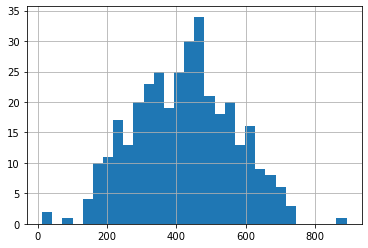

In [27]:
tariff_describe(df_smart_pivot['min_sum'], '"Смарт"', 'минуты разговора') # минуты разговора, тариф Смарт

Сгруппировав данные по пользователям, выходит, что в месяц в среднем тратится от 250 до 500 минут разговора (что является границей лимита), распределение нормальное, а так же есть несколько юзеров, которые в среднем превышают свой лимит до 800 минут в месяц.

AxesSubplot(0.125,0.125;0.775x0.755)
Тариф "Смарт", исследуемая переменная: сообщения
Дисперсия равна: 617.5094965861844
Среднее отклонение равно: 24.849738360517687
Среднее количество равно: 37.57560563057252


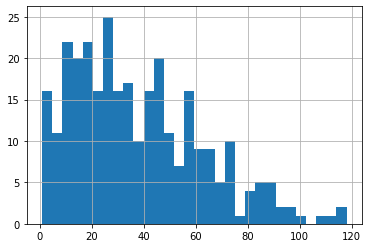

In [28]:
tariff_describe(df_smart_pivot['messages_count'], '"Смарт"', 'сообщения') # сообщения, тариф Смарт

Большинство пользователей предпочитает не использовать сообщения, зависимость тут явно убывающая, похожа на распределение Пуассона. Посмотрим что с интернет-трафиком, по правде сейчас вообще мало кто предпочитает смс-сервис.

AxesSubplot(0.125,0.125;0.775x0.755)
Тариф "Смарт", исследуемая переменная: интернет-трафик
Дисперсия равна: 12.241758342834496
Среднее отклонение равно: 3.4988224223064672
Среднее количество равно: 16.318233147804577


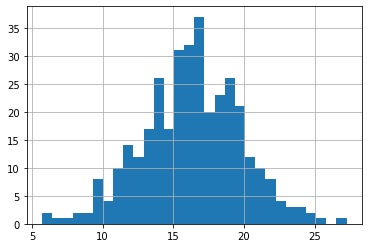

In [29]:
tariff_describe(df_smart_pivot['gb_sum'], '"Смарт"', 'интернет-трафик' ) # интернет-трафик, тариф Смарт

При лимите в 15 гб в месяц интернета пользователям явно не хватает, больше половины превышает ежемесячный лимит вплоть до 38 гб (а с учетом цены за один гигабайт в месяц выходит кругленькая сумма), распределение гистограммы визуально близко к нормальному.

### Анализ данных тарифа "Ультра"

Перейдем к тарифу Ультра: расчеты будут аналогичными.

In [30]:
df_ultra_pivot = df_ultra.pivot_table(index='user_id', values=['min_sum', 'messages_count', 'gb_sum'])
# сводная таблица по тарифу Ультра

AxesSubplot(0.125,0.125;0.775x0.755)
Тариф "Ультра", исследуемая переменная: минуты разговора
Дисперсия равна: 72005.47728889303
Среднее отклонение равно: 268.3383634311222
Среднее количество равно: 546.6854415786235


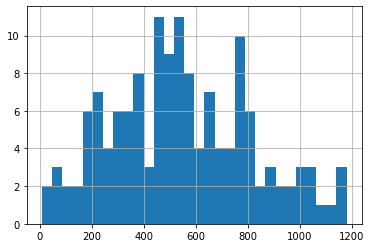

In [31]:
tariff_describe(df_ultra_pivot['min_sum'], '"Ультра"', 'минуты разговора') # минуты разговора, тариф Ультра

Среднее количество затраченных минут в этом тарифе почти на 150 больше, чем в тарифе Смарт, однако отклонение больше и разброс, соответственно, выше. По правилу трех сигм диапазон значений,  которые могут входить в исследуемую переменную, равен 1309 минут. Судя по гистограмме, лимита в 3000 минут пользователям более чем достаточно.

AxesSubplot(0.125,0.125;0.775x0.755)
Тариф "Ультра", исследуемая переменная: сообщения
Дисперсия равна: 1882.7452175564713
Среднее отклонение равно: 43.390612090133864
Среднее количество равно: 64.55580197132616


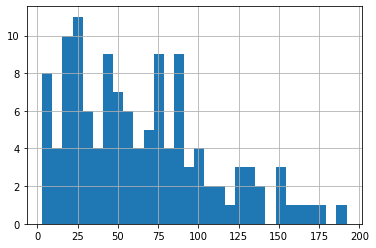

In [32]:
tariff_describe(df_ultra_pivot['messages_count'], '"Ультра"', 'сообщения') # сообщения, тариф Ультра

Сообщения не любит никто: подавляющее большинство их не тратит вообще, в среднем в месяц отправляется 64 смски.

AxesSubplot(0.125,0.125;0.775x0.755)
Тариф "Ультра", исследуемая переменная: интернет-трафик
Дисперсия равна: 63.530183645406744
Среднее отклонение равно: 7.970582390604011
Среднее количество равно: 19.74082368878287


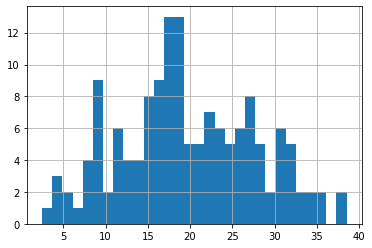

In [33]:
tariff_describe(df_ultra_pivot['gb_sum'], '"Ультра"', 'интернет-трафик') # интернет-трафик, тариф Ультра

Лимит у пользователей Ультра - 30 гигабайт, в среднем уходит 19 со средним отклонением 8 гб, в этом тарифе за интернет почти не переплачивают. Распределения этого тарифа аналогичны распределению предыдущего тарифа.

## Проверка гипотез

### Средние выручки пользователей тарифов "Смарт" и "Ультра" различаются

Итак, нам нужно ответить в первую очередь на основной вопрос проекта - какой тариф приносит больше денег? Мы сделали много предварительных расчетов, рассчитали, сколько платит пользователь каждого тарифа в месяц, разделили данные на две небольшие выборки и сейчас можем провести статистический тест двух генеральных совокупностей по их выборкам соотвественно. 

Для начала сформулируем нулевую гипотезу так, чтобы она содержала в себе знак равенства, а именно: 

**H₀ - средние выручки пользователей тарифов "Смарт" и "Ультра" равны.**

На основе нулевой гипотезы сформулируем альтернативную:

**H₁ - средние выручки пользователей тарифов «Ультра» и «Смарт» различаются.**

Гипотеза двусторонняя, так как отклонение может быть и в большую, и в меньшую сторону.

Проведем t-тест, выборки отличаются по размерам и дисперсии, поэтому параметр equal_var будет False.

In [34]:
df_ultra_users = df_ultra.pivot_table(index='user_id', values='total_income')
df_smart_users = df_smart.pivot_table(index='user_id', values='total_income')

# Так как в датасетах у меня собраны данные о каждом месяце оплаты пользователей, 
# сначала я делаю сводную таблицу по средней выручке с каждого юзера

In [35]:
alpha = .01 # критический уровень статистической значимости ставлю 1%

results = st.ttest_ind(
    df_smart_users, 
    df_ultra_users,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('Средняя выручка пользователей тарифа "Смарт":', df_smart_users['total_income'].mean())
print('Средняя выручка пользователей тарифа "Ультра":', df_ultra_users['total_income'].mean())

p-значение: [7.2487242e-60]
Отвергаем нулевую гипотезу
Средняя выручка пользователей тарифа "Смарт": 1322.1947485641924
Средняя выручка пользователей тарифа "Ультра": 2085.548788459863


Полученное значение p-value дает нам достаточно оснований для того, чтобы отвергнуть нулевую гипотезу о равенстве средних выручек двух тарифов, следовательно, они действительно различаются. Если судить по средним показателям, а так же об изначальных данных (напомню, ежемесячная оплата тарифа Ультра - 1950 рублей, а тарифа Смарт - 550 рублей, разница огромна; так же стоит упомянуть наши предыдущие гистограммы, пользователям тарифа Ультра преимущественно хватает установленных лимитов на звонки, смс и интернет), *можно прийти к выводу, что тариф Ультра для компании приносит больше прибыли, и вкладываться нужно именно в него.*

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Проверим вторую гипотезу. Помня о том, что нулевая гипотеза должна содержать в себе равенство, сформулируем ее как:

**H₀ - средняя выручка пользователей из Москвы и из других регонов равны.**

Следовательно, альтернативная гипотеза:

**H₁ - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**

Значение альфа оставим без изменений.

In [36]:
users_moscow = (users_income
                .query('city == "Москва"')
                .pivot_table(index='user_id', values='total_income')
               )
users_other = (users_income
               .query('city != "Москва"')
               .pivot_table(index='user_id', values='total_income')
              )

# делю данные на две выборки - пользователи с Москвы и из других городов

In [37]:
alpha = .01 # критический уровень статистической значимости ставлю 1%

results = st.ttest_ind(
    users_moscow, 
    users_other)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('Средняя выручка пользователей из Москвы:', users_moscow['total_income'].mean())
print('Средняя выручка пользователей из других городов:', users_other['total_income'].mean())

p-значение: [0.3727351]
Не получилось отвергнуть нулевую гипотезу
Средняя выручка пользователей из Москвы: 1498.465851152215
Средняя выручка пользователей из других городов: 1562.3167255922242


При условии, что нулевая гипотеза верна, вероятность получить исследумый результат будет равна 37,2%. При критическом пороге статистической значимости в 1% нулевая гипотеза не отвергается. Можно предположить, что выручка пользователей не зависит от их города и местоположения.

## Выводы

Итак, мы провели исследование и пришли к следующим выводам.
* У нас была выборка пользователей компании "Мегалайн" за 2018 год. Мы изучили данные, провели предобработку, а затем провели расчеты по каждому показателю и рассчитали, сколько каждый пользователь каждый месяц платит за свой тариф в зависимости от лимитов. 
* Исследовательский анализ показал, что потребности пользователей обоих тарифов примерно равны, распределения затрат минут разговора и интернет-трафика - нормальные, сообщений - по типу Пуассона. При равных затратах и разных лимитах заметно, что пользователи тарифа "Смарт" чаще доплачивают за минуты и гигабайты, а пользователям "Ультра" вполне хватает уже установленных лимитов. Разве что "Ультра" дороже в три с половиной раза тарифа "Смарт". 
* Нулевая гипотеза о равенстве средней выручки пользователей обоих тарифов была отвергнута при проведении статистического t-теста. На основе предоставленных выборок мы сделали предположение о прибыльности тарифа "Ультра", поэтому при проведение дальнейших рекламных компаний коммерческому департаменту будет предложено акцентировать внимание именно на этом тарифе.
* Средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов - при полученном p-значение вероятность получить такие результаты случайно слишком велика, чтобы отвергнуть нулевую гипотезу.